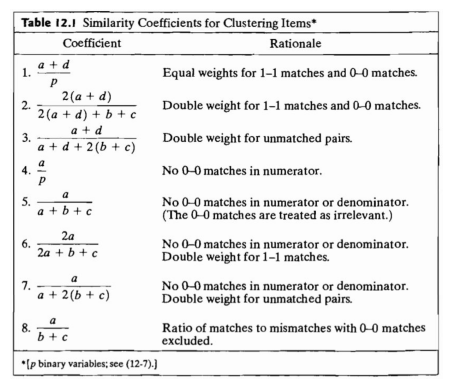

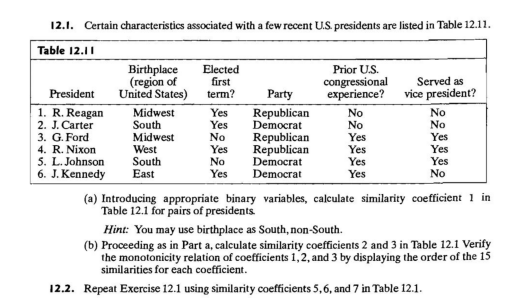

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('D:\MultivariateMethods\Homeworks\Coefficients.jpg')
img2 = mpimg.imread('D:\MultivariateMethods\Homeworks\Pregunta12_1.jpg')

plt.imshow(img)
plt.axis('off')  # Opcional: para quitar los ejes
plt.show()

plt.imshow(img2)
plt.axis('off')  # Opcional: para quitar los ejes
plt.show()

# Coeficientes de Similitud para Presidentes de EE.UU.

En este análisis, calcularemos los coeficientes de similitud para varios presidentes recientes de EE.UU. basándonos en características específicas como lugar de nacimiento, elección en el primer mandato, afiliación partidaria, experiencia previa en el Congreso de EE.UU., y si sirvieron como vicepresidente.

## Paso 1: Conversión a Variables Binarias

Convertimos las características de cada presidente en variables binarias de la siguiente manera:

1. **Lugar de nacimiento:**
   - 1 si el lugar de nacimiento es el Sur; 0 en caso contrario.
2. **¿Electo en el primer mandato?:**
   - 1 si fue electo en el primer mandato; 0 en caso contrario.
3. **Partido:**
   - 1 para Republicano; 0 para Demócrata.
4. **Experiencia Congresional Previa:**
   - 1 si tiene experiencia previa; 0 en caso contrario.
5. **¿Sirvió como Vicepresidente?:**
   - 1 si sirvió como vicepresidente; 0 en caso contrario.

La tabla con las variables binarias es la siguiente:

| Presidente     | Sur | Primer Mandato | Partido | Experiencia | Vicepresidente |
|---------------|-----|----------------|--------|-------------|----------------|
| R. Reagan     | 0   | 1              | 1      | 0           | 0              |
| J. Carter     | 1   | 1              | 0      | 0           | 0              |
| G. Ford       | 0   | 0              | 1      | 1           | 1              |
| R. Nixon      | 0   | 1              | 1      | 1           | 1              |
| L. Johnson    | 1   | 0              | 0      | 1           | 1              |
| J. Kennedy    | 0   | 1              | 0      | 1           | 0              |

## Paso 2: Cálculo de los Coeficientes de Similitud

Utilizamos los siguientes coeficientes de similitud:

1. **Coeficiente 1:** (a + d) / p
2. **Coeficiente 2:** (2 * (a + d)) / (2 * (a + d) + b + c)
3. **Coeficiente 3:** (a + d) / (a + d + 2 * (b + c))

Donde:
- `a`: Número de atributos donde ambos presidentes tienen 1.
- `d`: Número de atributos donde ambos presidentes tienen 0.
- `b`: Número de atributos donde el primer presidente tiene 1 y el segundo tiene 0.
- `c`: Número de atributos donde el primer presidente tiene 0 y el segundo tiene 1.
- `p`: Número total de atributos.

Los coeficientes se calculan para cada par de presidentes en el conjunto de datos.


In [6]:
import pandas as pd

# Crear DataFrame con los datos binarios
data = {
    'Presidente': ['R. Reagan', 'J. Carter', 'G. Ford', 'R. Nixon', 'L. Johnson', 'J. Kennedy'],
    'Nacimiento (Sur=1)': [0, 1, 0, 0, 1, 0],
    'Primer Mandato (Sí=1)': [1, 1, 0, 1, 0, 1],
    'Partido (Rep=1)': [1, 0, 1, 1, 0, 0],
    'Experiencia Congresional (Sí=1)': [0, 0, 1, 1, 1, 1],
    'Vicepresidente (Sí=1)': [0, 0, 1, 1, 1, 0]
}

df = pd.DataFrame(data)

# Función para calcular los coeficientes de similitud entre dos presidentes
def calculate_similarity(row1, row2):
    a = sum((row1 == 1) & (row2 == 1))
    d = sum((row1 == 0) & (row2 == 0))
    b = sum((row1 == 1) & (row2 == 0))
    c = sum((row1 == 0) & (row2 == 1))
    p = len(row1)
    
    coef1 = (a + d) / p
    coef2 = (2 * (a + d)) / (2 * (a + d) + b + c)
    coef3 = (a + d) / (a + d + 2 * (b + c))
    
    return coef1, coef2, coef3

# Calcular coeficientes para cada par de presidentes
similarities = []

for i in range(len(df)):
    for j in range(i + 1, len(df)):
        row1 = df.iloc[i, 1:]
        row2 = df.iloc[j, 1:]
        coef1, coef2, coef3 = calculate_similarity(row1, row2)
        similarities.append({
            'Presidente 1': df.iloc[i, 0],
            'Presidente 2': df.iloc[j, 0],
            'Coef1': coef1,
            'Coef2': coef2,
            'Coef3': coef3
        })

# Convertir a DataFrame y mostrar resultados
similarities_df = pd.DataFrame(similarities)

# Mostrar los resultados
similarities_df

,Presidente 1,Presidente 2,Coef1,Coef2,Coef3
0,R. Reagan,J. Carter,0.6,0.750000,0.428571
1,R. Reagan,G. Ford,0.4,0.571429,0.250000
2,R. Reagan,R. Nixon,0.6,0.750000,0.428571
3,R. Reagan,L. Johnson,0.0,0.000000,0.000000
4,R. Reagan,J. Kennedy,0.6,0.750000,0.428571
5,J. Carter,G. Ford,0.0,0.000000,0.000000
6,J. Carter,R. Nixon,0.2,0.333333,0.111111
7,J. Carter,L. Johnson,0.4,0.571429,0.250000
8,J. Carter,J. Kennedy,0.6,0.750000,0.428571
9,G. Ford,R. Nixon,0.8,0.888889,0.666667


# Análisis de Resultados: Coeficientes de Similitud entre Presidentes

## Resumen de Resultados

1. **Interpretación de Coeficientes:**
   - **Coeficiente 1**: Indica la proporción de atributos donde ambos presidentes coinciden, ya sea que ambos tienen el valor 1 o 0. Un valor más alto significa mayor similitud general.
   - **Coeficiente 2**: Da más peso a las coincidencias y penaliza más los desacuerdos. Un valor más alto indica más coincidencias fuertes.
   - **Coeficiente 3**: Similar al coeficiente 2, pero con más penalización a las diferencias. Un valor más alto implica más similitud, considerando las discordancias con mayor importancia.

2. **Parejas con Mayor Similitud:**
   - **G. Ford y R. Nixon** tienen el **mayor Coeficiente 1 (0.8)** y **mayor Coeficiente 2 (0.8889)**, indicando que son los presidentes con más características en común, especialmente considerando coincidencias.
   - También tienen el **mayor Coeficiente 3 (0.6667)**, lo que implica que las discordancias son mínimas.

3. **Parejas con Menor Similitud:**
   - **R. Reagan y L. Johnson** y **J. Carter y G. Ford** tienen un **Coeficiente 1 de 0**, lo que significa que no tienen ninguna característica en común, ya sea ambos con valor 1 o ambos con valor 0.
   - **R. Reagan y L. Johnson** también tienen un **Coeficiente 2 y 3 de 0**, indicando que no tienen coincidencias significativas.

4. **Otras Observaciones Relevantes:**
   - Las parejas **R. Reagan y J. Carter**, **R. Reagan y R. Nixon**, y **J. Carter y J. Kennedy** tienen Coeficientes 1 y 2 altos (0.6 y 0.75), mostrando que tienen un número considerable de características similares.
   - La similitud entre **J. Carter y L. Johnson** y **L. Johnson y J. Kennedy** es media, con Coeficiente 1 de 0.4, lo que indica algunas coincidencias, pero también varias diferencias.
